#**Objetivo:** 

 


Objetivo:
Data storytelling es un enfoque estructurado para comunicar información sobre los datos, utilizando elementos narrativos y elementos visuales.
En este trabajo desarrollamos algunas hipotesis, las presentamos y las comprobamos.


 ##StoryTelling:

* EDAD vs GASTOS: ¿La edad de los consumidores influye en la cantidad de compras y en la cantidad de Gastos?
* ¿Existe una relación entre la cantidad de compras de carne segun tenga hijos pequeños o adolecentes?
* ¿Existe una relación entre el importe gastado en golosinas y la cantidad de hijos sean niños y adolecentes?

## Librerias:

In [19]:
import seaborn as sns
import pandas as pd
import missingno as msno
import numpy 
import matplotlib.pyplot       as plt
import matplotlib.pyplot       as plot


import numpy as np
%matplotlib inline
from google.colab import drive
import os
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
#install library
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
#leer CSV dentro de un DataFrame
df=pd.read_csv('marketing_campaignLIMPIO.csv', sep=',')

In [22]:
#numero de filas y columnas 
df.head()

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,EDAD,Etapa,Mnt_total,Hijos_totales
0,0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,66,Adulto mayor,1617,0
1,1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,69,Adulto mayor,27,2
2,2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,58,Adulto,776,0
3,3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,39,joven,53,2
4,4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,42,Adulto,422,2


## StoryTelling 1: 

EDAD vs GASTOS: ¿La edad de los consumidores influye en la cantidad de compras y en la cantidad de Gastos?

Dentro de las diferentes variables que afectan el comportamiento del consumidor se presenta la **edad** como una variable relevante para la segmentación de mercados, debido a que demarca las diferentes etapas de su vida desde la niñez hasta la vejez, que traen consigo características físicas y biológicas, psicológicas, sociales, situacionales, entre otras; las que influyen en su comportamiento en relación con el **consumo y preferencias por marcas y productos**. 

Por tal motivo, resulta de interés investigar si en la muestra bajo estudio se presenta un patrón de interes en cuanto a la relación EDAD vs monto total gastado. 

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


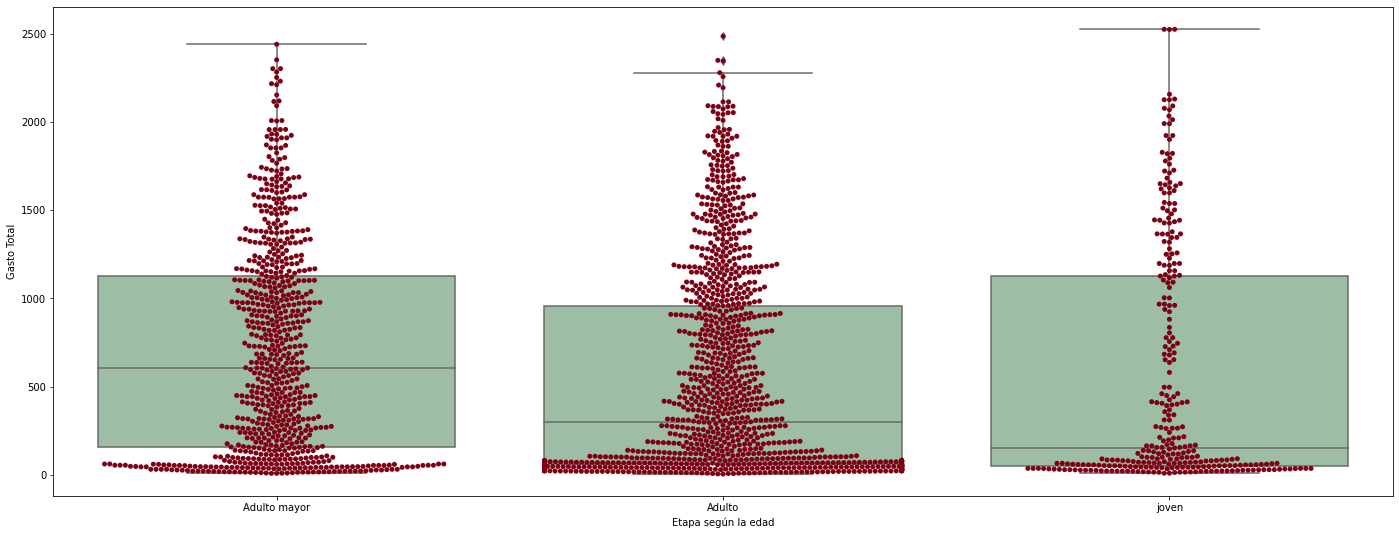

In [23]:
#mostramos para cada edad su media y DISPERSIÓN de los gastos.
f, ax = plt.subplots(figsize=(24, 9))

ax = sns.boxplot(x='Etapa', y = 'Mnt_total', data = df, color='#99c2a2')
ax = sns.swarmplot(x='Etapa', y = 'Mnt_total', data = df , color='#7d0013', dodge = True)
ax.set_ylabel('Gasto Total')
ax.set_xlabel('Etapa según la edad')
plt.show()

La media más alta es en la etapa adulta mayor.


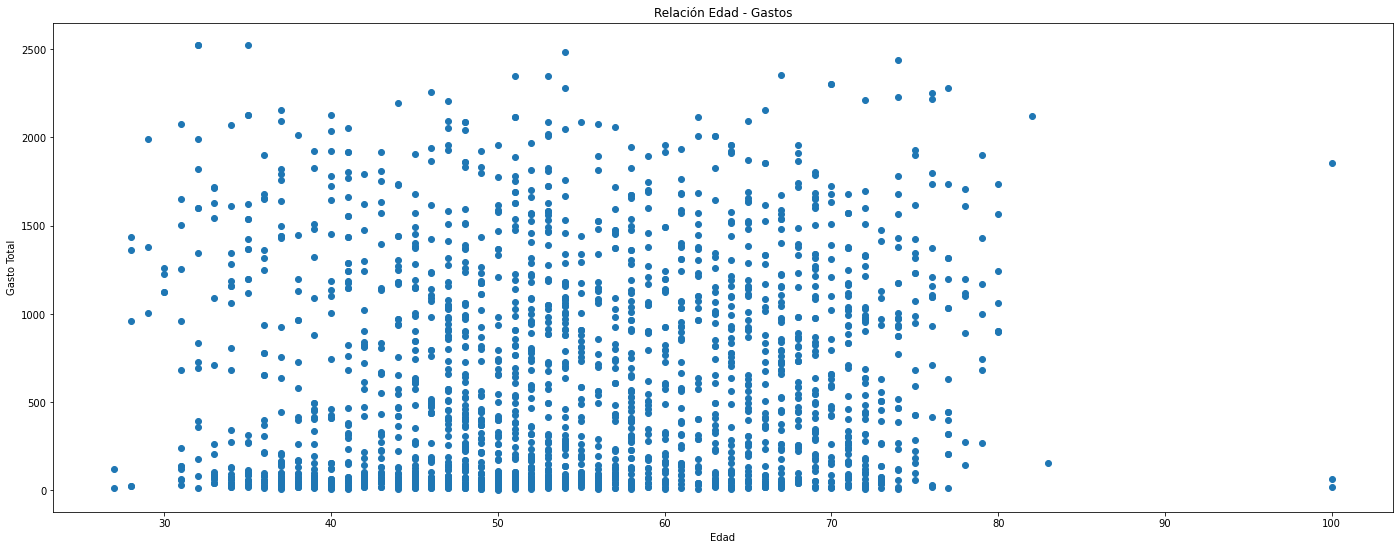

In [24]:
#mostramos la DISPERSIÓN de los gastos por edad
f, ax = plt.subplots(figsize=(24, 9))
x = df['EDAD']
y = df['Mnt_total']
ax.set_ylabel('Gasto Total')
ax.set_xlabel('Edad')
plt.title("Relación Edad - Gastos")
plt.scatter(x, y)

In [25]:
#vamos a agrupar por edad y sumar el gasto total de cada edad.
df2 = df[['Mnt_total','Etapa']]

In [26]:
agg = df2.groupby('Etapa').agg([np.sum])
agg


,Mnt_total
,sum
Etapa,
Adulto,651374
Adulto mayor,527695
joven,169389


In [27]:
agg3= df2.groupby('Etapa').agg([np.mean])

In [28]:
agg.columns = ['Gastototal']

In [29]:
agg3.columns = ['Gastototal']

Text(0.5, 1.0, 'Relación Gastos de total y edad')

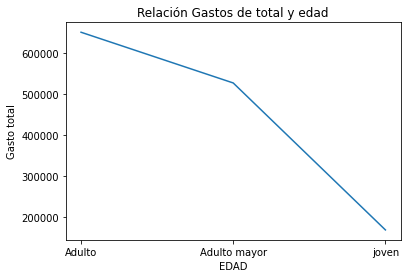

In [30]:
# Datos
x = agg.index
y = agg['Gastototal']

# Gráfico de líneas
fig, ax = plt.subplots()
ax.plot(x, y)


ax.set_ylabel('Gasto total')
ax.set_xlabel('EDAD')
plt.title("Relación Gastos de total y edad")
#vemos la evolución del gasto a medida que aumenta la edad.

Text(0.5, 1.0, 'Relación Gastos de total y edad')

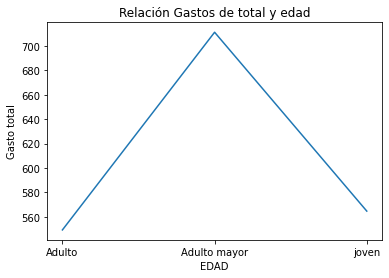

In [31]:
x = agg3.index
y = agg3['Gastototal']

# Gráfico de líneas
fig, ax = plt.subplots()
ax.plot(x, y)


ax.set_ylabel('Gasto total')
ax.set_xlabel('EDAD')
plt.title("Relación Gastos de total y edad")
# La media de la etapa joven es alta por que hay pocos valores y uno de ellos es muy alto 

Segun informes del ClearScore los consumidores que están en la décadas de los 40 a 80 años son los que más gastan en productos alimenticios. 

**Segun nuestra muestra se refleja este comportamiento** tanto en la cantidad gastada como en la cantidad de compras realizadas. 

Si bien la **cantidad de compras** es alto entre los 40 y 60 (seguramente tenga que ver con la cantidad y edad de los hijos que posean). 
Entre los 60 y 80 el **importe de compras** es tambien elevado ya que este grupo se inclinan por consumos más vinculados al hogar, ya sea para comer, salud o la mantención de la casa (según el informe de la CCS), esto se debe al importante aumento de la esperanza de vida y el gradual envejecimiento que influyen en la calidad de la alimentación.


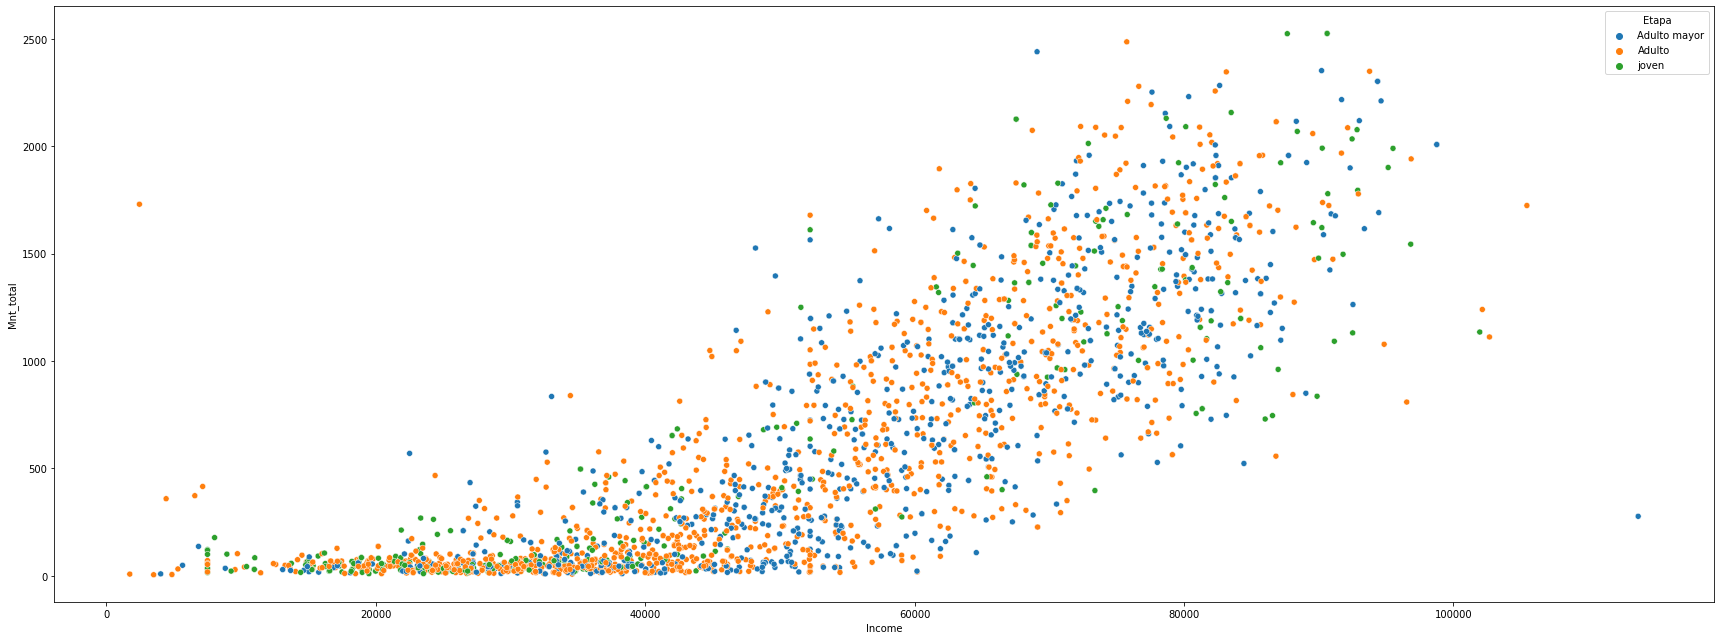

In [32]:
f, ax = plt.subplots(figsize=(24, 9))
sns.scatterplot(x='Income', y='Mnt_total', hue='Etapa', data=df);
f.tight_layout()

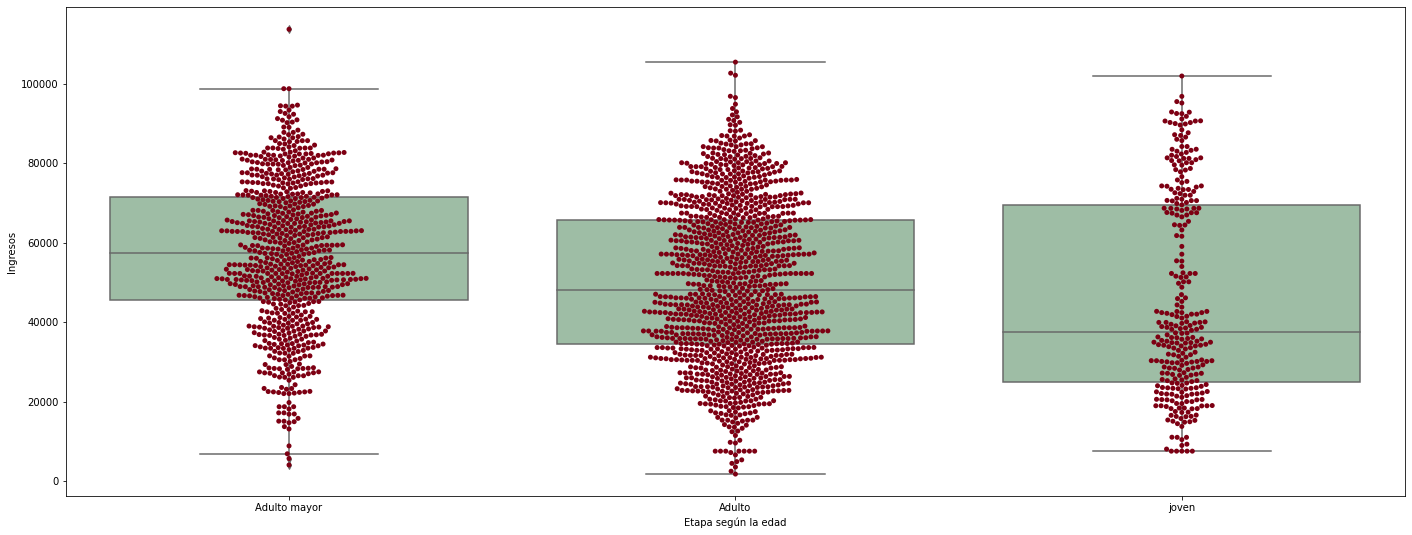

In [33]:
f, ax = plt.subplots(figsize=(24, 9))

ax = sns.boxplot(x='Etapa', y = 'Income', data = df, color='#99c2a2')
ax = sns.swarmplot(x='Etapa', y = 'Income', data = df , color='#7d0013', dodge = True)
ax.set_ylabel('Ingresos')
ax.set_xlabel('Etapa según la edad')
plt.show()

El mayor consumo de los "Adultos mayor" puede que coincida con los ingresos, donde vemos que la media es mayor a la de los adultos y los jovenes. 
Esta muestra evidentemente no es de Argentina. 
Del primer grafico tambien vemos la correlacion en general entre los consumos y los ingresos. 

## StoryTelling 2: 

¿Existe una relación entre la **cantidad de compras de carne** segun tenga hijos pequeños o **adolecentes**?

Los verdaderos gastos llegan con los hijos adolescentes. En este caso analizaremos con gastos puntuales en carne, pero en general las personas consumen mas alimentos en esta edad. Porque son más activos que los adultos y porque también están creciendo.

Los padres de adolescentes ya tienen pruebas para respaldar la afirmación de que alimentar a sus hijos puede costar una fortuna, después de que un estudio en los EEUU concluyó que los niños de entre 14 y 17 años comerían un almuerzo de 2.000 calorías si pudieran.



In [34]:
Kidhome = df[['MntMeatProducts','Kidhome']]

In [35]:
Kidhome =Kidhome[(Kidhome.Kidhome>0)] 

In [36]:
Teenhome=df[['MntMeatProducts','Teenhome']]

In [37]:
Teenhome =Teenhome[(Teenhome.Teenhome>0)] 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Relación Gastos de Carne con Respecto a hijos pequeños y adolecentes')

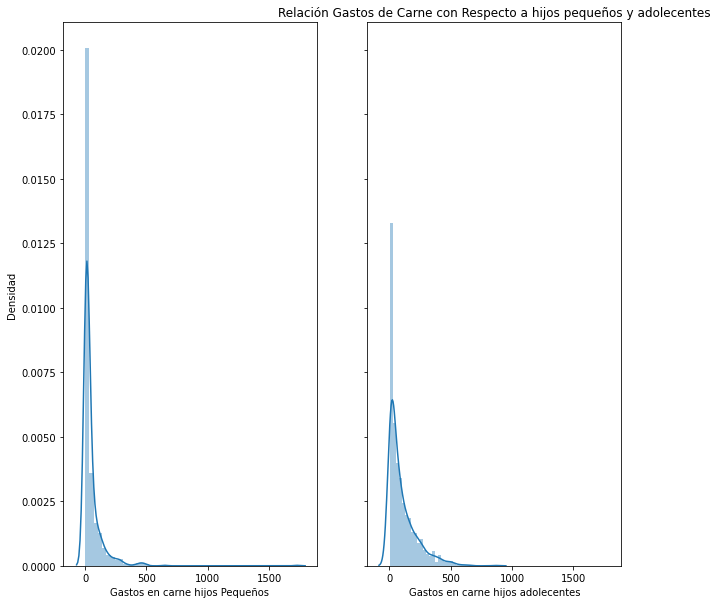

In [38]:
f, axs = plt.subplots(1, 2, figsize=(10, 10), gridspec_kw=dict(width_ratios=[4, 4]), sharex=True, sharey=True )
sns.distplot(Kidhome['MntMeatProducts'], ax=axs[0])
sns.distplot(Teenhome['MntMeatProducts'], ax=axs[1])

axs[0].set_ylabel('Densidad')
axs[0].set_xlabel('Gastos en carne hijos Pequeños')
axs[1].set_ylabel('Densidad')
axs[1].set_xlabel('Gastos en carne hijos adolecentes')
plt.title("Relación Gastos de Carne con Respecto a hijos pequeños y adolecentes")

Podemos ver que hay mayor densidad de compras en el dataframe de padres con hijos adolescentes.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


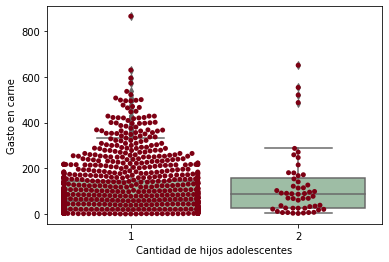

In [39]:
fig, ax = plt.subplots()
ax = sns.boxplot(x='Teenhome', y = 'MntMeatProducts', data = Teenhome, color='#99c2a2')
ax = sns.swarmplot(x='Teenhome', y = 'MntMeatProducts', data = Teenhome , color='#7d0013', dodge = True)
ax.set_ylabel('Gasto en carne')
ax.set_xlabel('Cantidad de hijos adolescentes')
plt.show()

En cuanto a profundizar para ver si influye la cantidad de hijos adolescentes en los gastos en carne no lo podemos hacer por la poca cantidad de datos (de la muestra) en el grupo de mas de 2 hijos. 

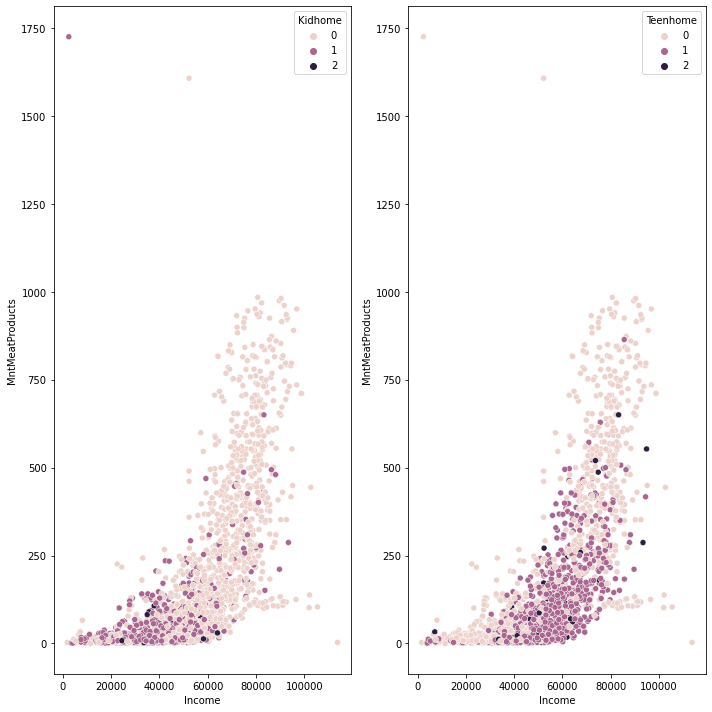

In [40]:
f, axs = plt.subplots(1, 2, figsize=(10, 10), gridspec_kw=dict(width_ratios=[4, 4]))
sns.scatterplot(x='Income', y='MntMeatProducts', hue='Kidhome', data=df, ax=axs[0]);
sns.scatterplot(x='Income', y='MntMeatProducts', hue='Teenhome', data=df, ax=axs[1]);
f.tight_layout()

Los que tienen hijos adolecentes compran mas carne que los que tienen hijos pequeños. 

Tambien Se observa esta tendencia cuando cobran entre 40000 y 60000 pesos (Y es por que ahí esta la mediana) y gastan en carne entre 0 a 600 pesos (en mayor cantidad). Por el contrario, los que poseen niños pequeños compan entre 0 a 200 pesos en carne. 
Esta misma tendencia se observa para los otros tipos de compras también.

## StoryTelling 3: 

¿Existe una relación entre el **importe gastado en golosinas** y la cantidad de hijos sean **niños** y **adolecentes**?

Conocer e interpretar el perfil de los clientes siempre ha sido uno de los objetivos del área comercial y de marketing de las empresas. Tomando esto en consideración, resulta relevante conocer si en nuestra data  existe una relación en el gasto que tienen los clientes en la compra de golosinas con la cantidad de hijos que tenga el grupo familiar. 

Se puede llegar a suponer que aquellas familias que tengan hijos (adolescentes o niños) puede tener un consumo mayor en dulces que aquellos que no tengan hijos. 


In [41]:
#sumanos la cantidad de hijos entre niños y adolescentes
df['Hijos_totales'] = df['Kidhome'] + df['Kidhome'] 

In [42]:
#relación entre el gasto realizado en dulces con la cantidad de hijos
tabla = df.pivot_table(index='Hijos_totales', values = ['MntSweetProducts'], aggfunc = 'sum' )
tabla

,MntSweetProducts
Hijos_totales,
0,52290
2,8028
4,226


In [43]:
#la tabla anterior nos muestra que el mayor gasto lo realiza las familias sin hijos. 
tabla.max().max()

52290

In [44]:
#dado el resultado anterior, comprobamos que exista una correlación negativa entre ambas variables 
correlacion=df.corr()
correlacion.loc["Hijos_totales", "MntSweetProducts"]

-0.37248515124257664

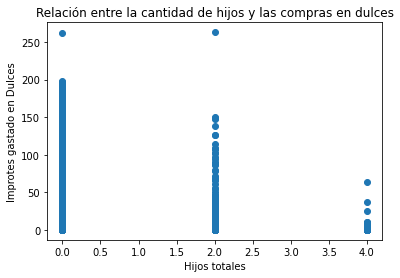

In [45]:
plt.plot( 'Hijos_totales', 'MntSweetProducts', data=df, linestyle='none', marker='o')
plt.title('Relación entre la cantidad de hijos y las compras en dulces')
plt.xlabel('Hijos totales')
plt.ylabel('Improtes gastado en Dulces')
plt.show()

Dado que existe una correlación negativa entre las variables, se concluye que a medida que se tengan menos hijos el importe gastado en dulces es mayor que aquellas familas que tienen 2 o 4 hijos. 

La mayoria no gasta o esta muy cerca de 0.